In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [13]:
df = pd.read_csv('COST.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1255,11/11/21,506.200012,512.500000,504.040009,512.179993,512.179993,1227300.0
1256,11/12/21,514.250000,519.659973,513.229980,517.169983,517.169983,1779500.0
1257,11/15/21,518.489990,523.099976,518.010010,519.890015,519.890015,1391900.0
1258,11/16/21,NaN,NaN,NaN,NaN,NaN,NaN
1259,11/17/21,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df['Open'].values
df = df.reshape(-1, 1)
train = np.array(df[:int(df.shape[0]*0.7)])
test = np.array(df[int(df.shape[0]*0.7):])
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

In [6]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [7]:
x_train, y_train = create_dataset(train)
x_test, y_test = create_dataset(test)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [8]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

2021-11-19 13:18:38.071510: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
model.compile(loss='mean_squared_error', optimizer='adam')
print(x_test.shape)

(328, 50, 1)


In [10]:
model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
13/13 [==============================] - 7s 146ms/step - loss: 0.0730
Epoch 2/50
13/13 [==============================] - 2s 160ms/step - loss: 0.0132
Epoch 3/50
13/13 [==============================] - 2s 163ms/step - loss: 0.0074
Epoch 4/50
13/13 [==============================] - 2s 159ms/step - loss: 0.0050
Epoch 5/50
13/13 [==============================] - 2s 158ms/step - loss: 0.0044
Epoch 6/50
13/13 [==============================] - 2s 143ms/step - loss: 0.0046
Epoch 7/50
13/13 [==============================] - 2s 150ms/step - loss: 0.0044
Epoch 8/50
13/13 [==============================] - 2s 168ms/step - loss: 0.0046
Epoch 9/50
13/13 [==============================] - 2s 143ms/step - loss: 0.0039
Epoch 10/50
13/13 [==============================] - 2s 165ms/step - loss: 0.0040
Epoch 11/50
13/13 [==============================] - 2s 160ms/step - loss: 0.0037
Epoch 12/50
13/13 [==============================] - 2s 169ms/step - loss: 0.0041
Epoch 13/50
13/13 [======

(328, 1)


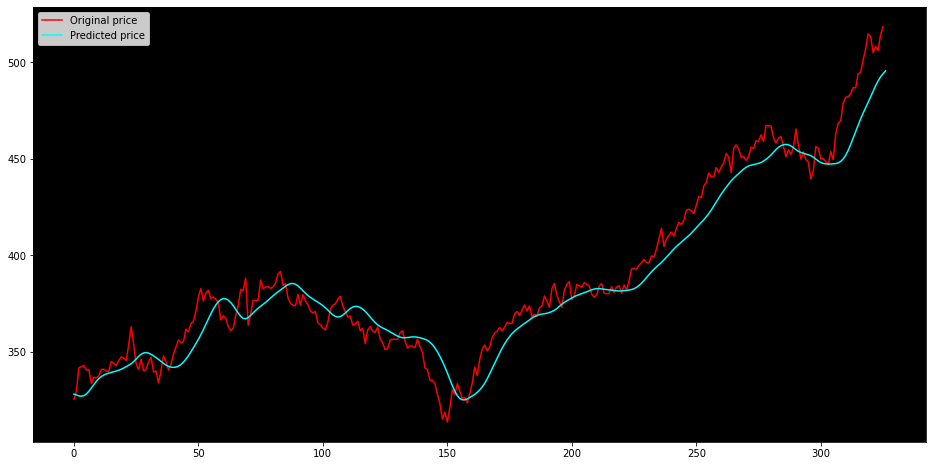

In [16]:
predictions = model.predict(x_test)
print(predictions.shape)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000000')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()